In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits
from astropy.table import Table
from astropy.timeseries import BoxLeastSquares
from astropy import units as u

## References

For some parts I used ChatGPT to help me, however I refrained from copying any code and solely used it as a way to easily know what each function did without having to search through astropy documentation or to understand general concepts. 

Additionally, all data shown here can be downloaded from the Mikulski Archive for Space Telescopes (MAST).

# Data Acquisition and Processing

Examine the header and columns of the data in order to see what data we can access and the units that are used 

In [2]:
tess3 = fits.open("tess2018234235059-s0002-0000000100100827-0121-s_lc.fits")
events = Table.read(tess3, hdu=1)
print(events.columns)
tess3header = tess3[0].header
tess3header

<TableColumns names=('TIME','TIMECORR','CADENCENO','SAP_FLUX','SAP_FLUX_ERR','SAP_BKG','SAP_BKG_ERR','PDCSAP_FLUX','PDCSAP_FLUX_ERR','QUALITY','PSF_CENTR1','PSF_CENTR1_ERR','PSF_CENTR2','PSF_CENTR2_ERR','MOM_CENTR1','MOM_CENTR1_ERR','MOM_CENTR2','MOM_CENTR2_ERR','POS_CORR1','POS_CORR2')>


SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2020-09-18'         / file creation date.                            
TSTART  =    1354.110812912334 / observation start time in BTJD                 
TSTOP   =    1381.518153307133 / observation stop time in BTJD                  
DATE-OBS= '2018-08-23T14:38:

Below we load all of the data into their own np arrays, normalize, and clean the data. Finally, we concatenate them all into one big array which includes the time, flux, flux error, and quality.

In [58]:
#ignore the numbering, it's not important it's just because I originally accidentally included some data that I wasn't supposed to 
tess3 = fits.open("tess2018234235059-s0002-0000000100100827-0121-s_lc.fits")
data3 = tess3[1].data
time3 = data3['TIME']
flux3 = data3['PDCSAP_FLUX']
error3 = data3['PDCSAP_FLUX_ERR']
quality3 = data3['QUALITY']
data3 = np.array([time3[quality3==0],flux3[quality3==0]/np.nanmedian(flux3[quality3==0]),error3[quality3==0]/np.nanmedian(flux3[quality3==0]),quality3[quality3==0]])

tess4 = fits.open("tess2018263035959-s0003-0000000100100827-0123-s_lc.fits")
data4 = tess4[1].data
time4 = data4['TIME']
flux4 = data4['PDCSAP_FLUX']
error4 = data4['PDCSAP_FLUX_ERR']
quality4 = data4['QUALITY']
data4 = np.array([time4[quality4==0],flux4[quality4==0]/np.nanmedian(flux4[quality4==0]),error4[quality4==0]/np.nanmedian(flux4[quality4==0]),quality4[quality4==0]])

tess6 = fits.open("tess2020238165205-s0029-0000000100100827-0193-s_lc.fits")
data6 = tess6[1].data
time6 = data6['TIME']
flux6 = data6['PDCSAP_FLUX']
error6 = data6['PDCSAP_FLUX_ERR']
quality6 = data6['QUALITY']
data6 = np.array([time6[quality6==0],flux6[quality6==0]/np.nanmedian(flux6[quality6==0]),error6[quality6==0]/np.nanmedian(flux6[quality6==0]),quality6[quality6==0]])

tess8 = fits.open("tess2020266004630-s0030-0000000100100827-0195-s_lc.fits")
data8 = tess8[1].data
time8 = data8['TIME']
flux8 = data8['PDCSAP_FLUX']
error8 = data8['PDCSAP_FLUX_ERR']
quality8 = data8['QUALITY']
data8 = np.array([time8[quality8==0],flux8[quality8==0]/np.nanmedian(flux8[quality8==0]),error8[quality8==0]/np.nanmedian(flux8[quality8==0]),quality8[quality8==0]])

#data10 had NaNs in it for some reason so just took em out to avoid any issues
tess10 = fits.open("tess2023237165326-s0069-0000000100100827-0264-s_lc.fits")
data10 = tess10[1].data
time10 = data10['TIME']
flux10 = data10['PDCSAP_FLUX']
error10 = data10['PDCSAP_FLUX_ERR']
quality10 = data10['QUALITY']
time10 = time10[~np.isnan(flux10)]
quality10 = quality10[~np.isnan(flux10)]
error10 = error10[~np.isnan(flux10)]/np.nanmedian(flux10)
flux10 = flux10[~np.isnan(flux10)]/np.nanmedian(flux10)

data10 = np.array([time10[quality10==0],flux10[quality10==0],error10[quality10==0],quality10[quality10==0]])

data = np.concatenate((data3,data4,data6,data8,data10),axis=1)
data = data[:,~np.isnan(data[1])]

Plot the concatenated light curve on a big graph with small dot size so that it doesn't just look like 3 lumps.

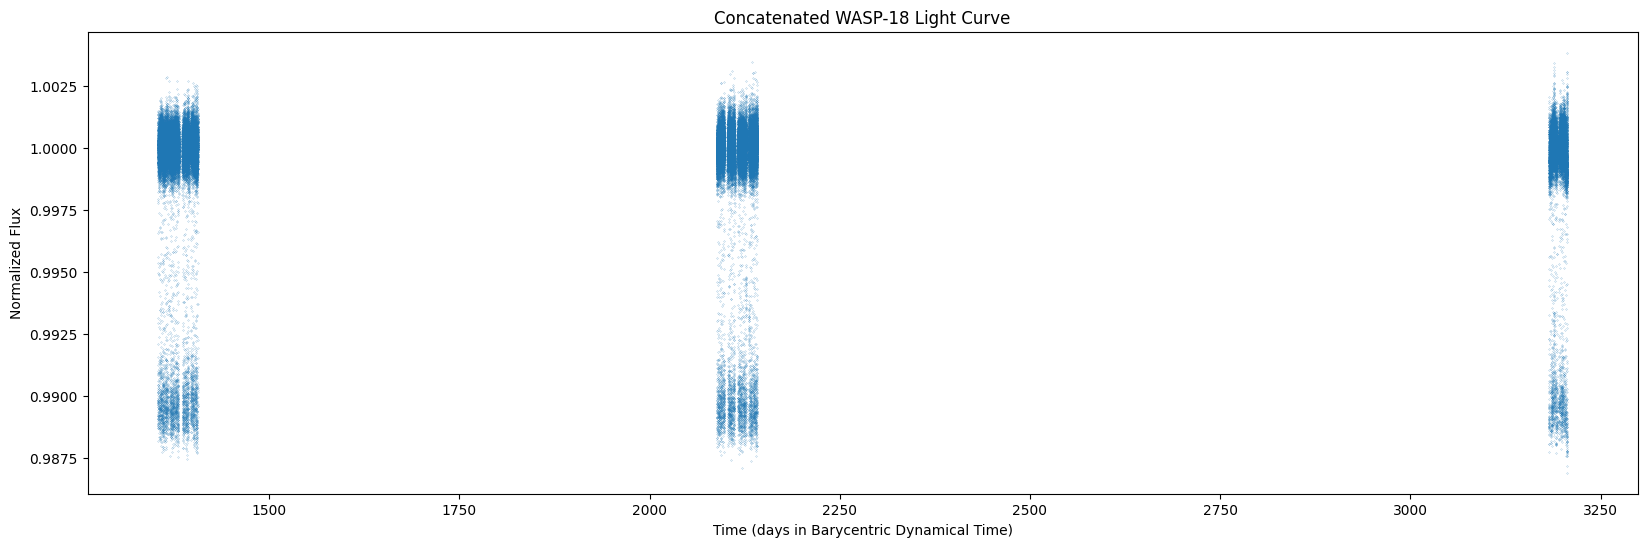

In [59]:
plt.figure(figsize=(20,6))
plt.title('Concatenated WASP-18 Light Curve')
plt.xlabel('Time (days in Barycentric Dynamical Time)')
plt.ylabel('Normalized Flux')
plt.scatter(data[0],data[1], s=0.02)
#if you want to view the error bars you can do this instead of the plt.scatter
#I didn't because it looks ugly when you do
#plt.errorbar(data[0],data[1],yerr=data[2],fmt='o',ms=0.01)
plt.show()

# Rediscovering WASP-18b

## Approximating Transit Duration

Below we are zooming in on transits within some light curves in order to approximate the transit duration

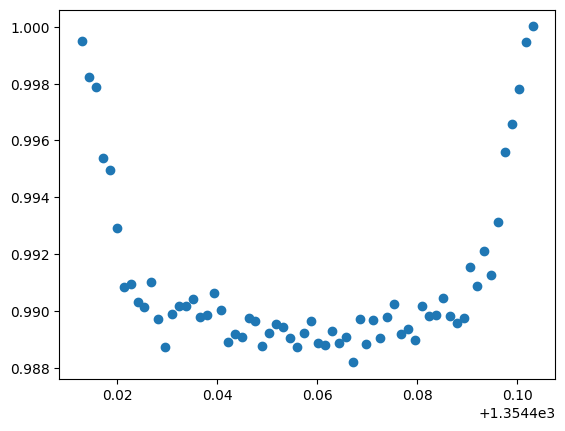

In [49]:
plt.scatter(data3[0,216:282],data3[1,216:282])
plt.show()

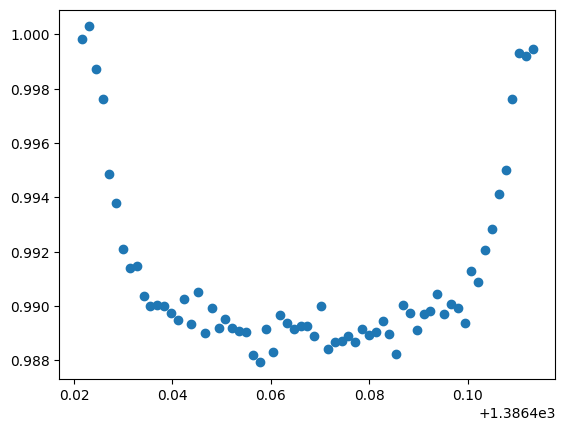

In [50]:
plt.scatter(data4[0,338:405],data4[1,338:405])
plt.show()

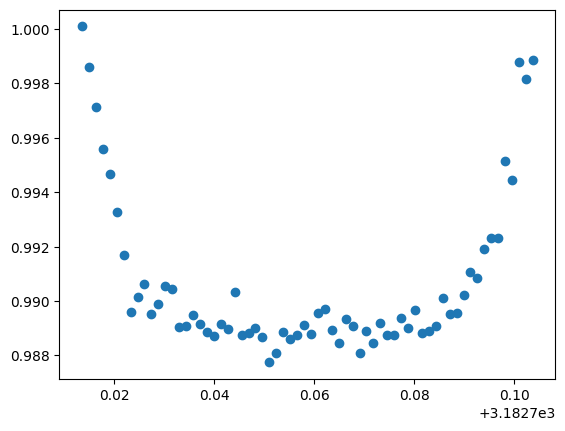

In [7]:
plt.scatter(data10[0,207:273],data10[1,207:273])
plt.show()

In [8]:
print(data3[0,282]-data3[0,216])
print(data4[0,405]-data4[0,338])
print(data10[0,273]-data10[0,207])

0.09166934510244573
0.09305505229417577
0.09166960583570471


In [184]:
duration=(0.09166960583570471+0.09305505229417577)/2.0
duration

0.09236232906494024

Based off of the zoomed-in transits above we can estimate the transit duration to be around 0.09236232906494024 days. 

## Testing Individual Periodograms

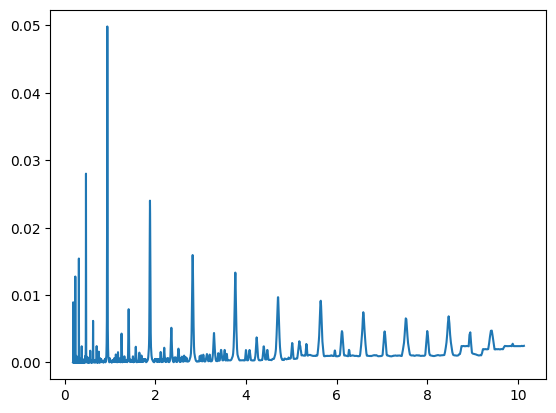

In [52]:
model = BoxLeastSquares(data4[0], data4[1])
periodogram = model.autopower(0.09236232906494024)
plt.plot(periodogram.period, periodogram.power) 
plt.show()

In [53]:
max_power = np.argmax(periodogram.power)
stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])
print(stats['depth'])
print(periodogram.period[max_power])

(0.008906175640944203, 0.02969455691978584)
0.9414570423764735


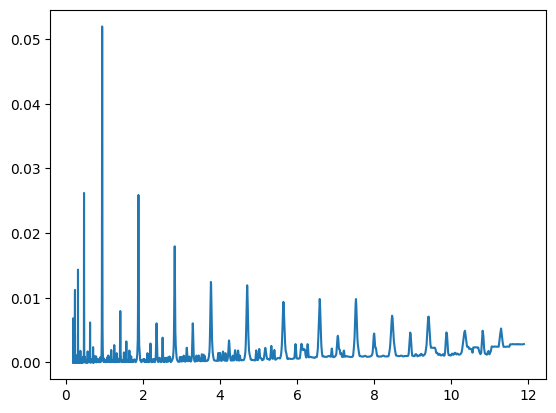

In [54]:
model = BoxLeastSquares(data10[0], data10[1])
periodogram = model.autopower(0.09236232906494024)
plt.plot(periodogram.period, periodogram.power) 
plt.show()

In [55]:
max_power = np.argmax(periodogram.power)
stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])
print(stats['depth'])
print(periodogram.period[max_power])

(0.008914739018444306, 0.028982278159246946)
0.9415302699727873


## Box Least Squares 

Based off of the individual light curves periodograms as well as the one for 3 transits we expect for the concatenated period to be somewhere around 0.9415 days. In order to avoid long runtimes or incorrect results we can try to identify a subset of the period grid given by model.autoperiod which includes a our expected period as well as a satisfactory range of other potential periods as well.

In [192]:
model = BoxLeastSquares(data4[0], data4[1])
periodGrid = model.autoperiod(0.09236232906494024)
#periodGrid[19000:20000]

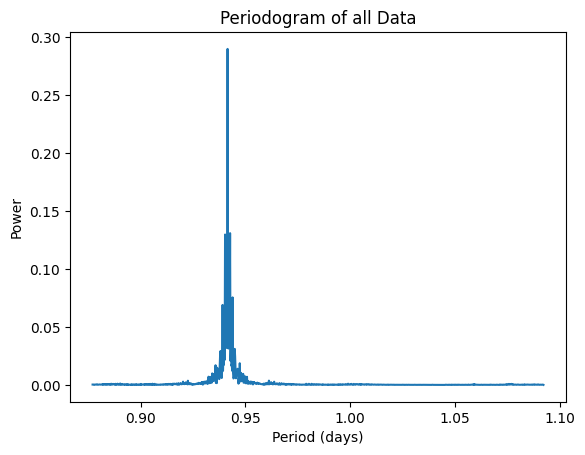

In [193]:
model = BoxLeastSquares(data[0], data[1])
periodogram = model.power(periodGrid[19000:20000],0.09236232906494024,method='fast')
plt.plot(periodogram.period, periodogram.power)
plt.title("Periodogram of all Data")
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.show()

In [194]:
max_power = np.argmax(periodogram.power)
stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])
period = periodogram.period[max_power]
epoch = periodogram.transit_time[max_power]
print(stats['depth'])
print(period)
print(epoch)

(0.008935824417788507, 0.012340153813640483)
0.9414570423764735
1354.4532478792596


## 3 Transit Phase Curve

In order to only plot the phase curve against 3 transit durations I zoom in on a piece of data, making sure to also include the secondary eclipses before and after.

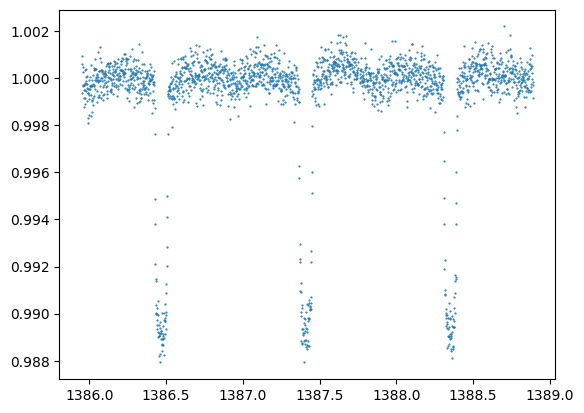

In [195]:
plt.scatter(data4[0,0:2100],data4[1,0:2100],s=0.3)
plt.show()

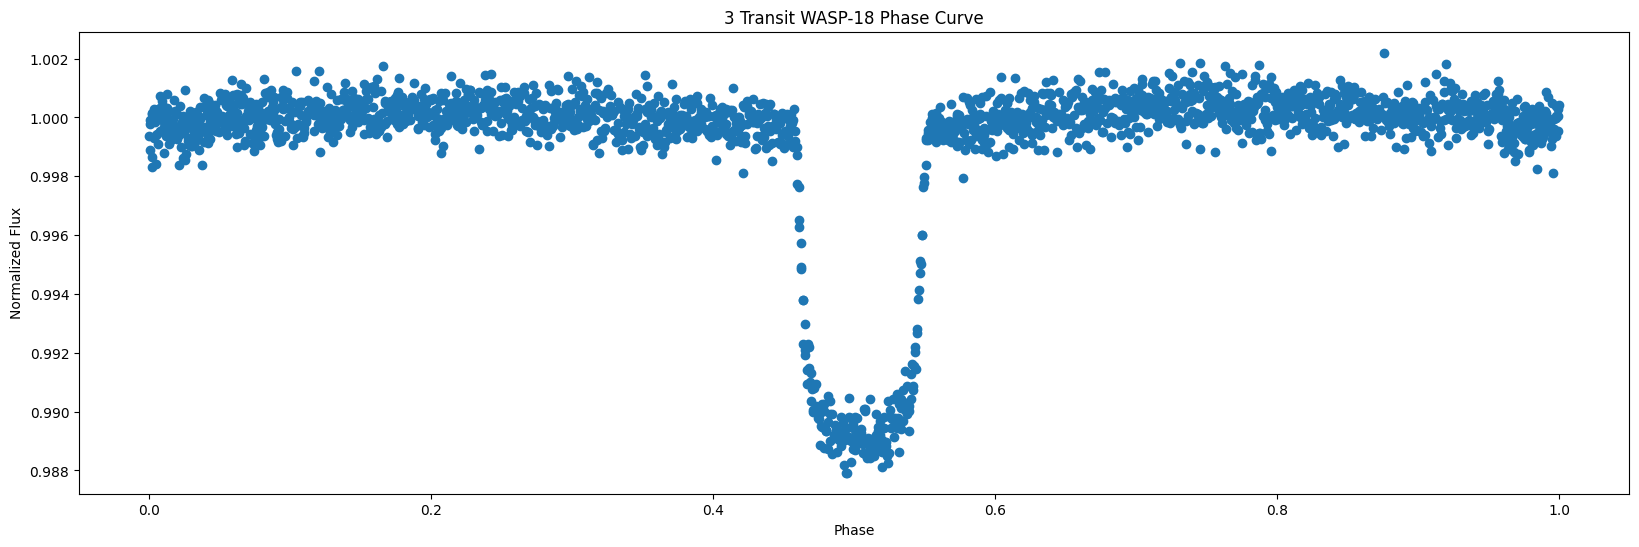

In [196]:
tripleTime = data4[0,0:2100]
tripleFlux = data4[1,0:2100]
phase = ((tripleTime-epoch+0.5*period)/period)%1.0
tripleFlux = tripleFlux[np.argsort(phase)]
phase = phase[np.argsort(phase)]

plt.figure(figsize=(20,6))
plt.title('3 Transit WASP-18 Phase Curve')
plt.xlabel('Phase')
plt.ylabel('Normalized Flux')
plt.scatter(phase,tripleFlux)
plt.show()

## Full Phase Curve of WASP-18b

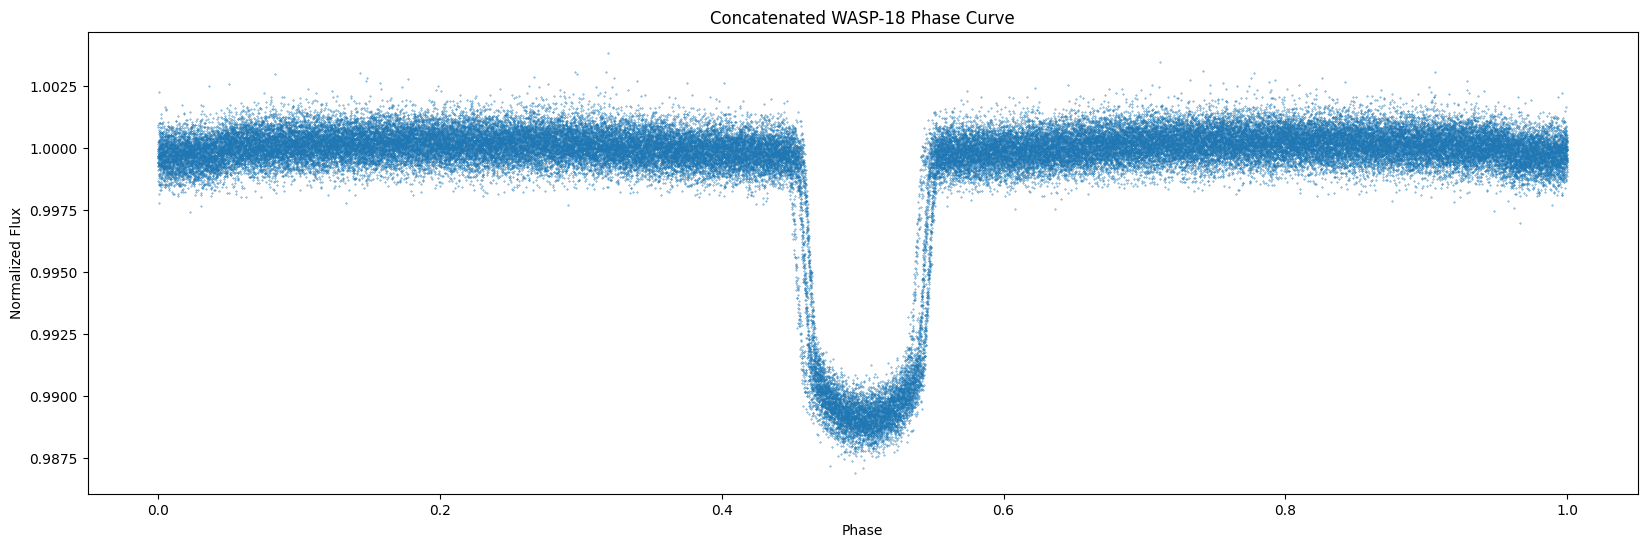

In [197]:
phase = ((data[0]-epoch+0.5*period)/period)%1.0
phaseFlux = data[1]
time = data[0]
time = time[np.argsort(phase)]
phaseFlux = phaseFlux[np.argsort(phase)]
phase = phase[np.argsort(phase)]

plt.figure(figsize=(20,6))
plt.title('Concatenated WASP-18 Phase Curve')
plt.xlabel('Phase')
plt.ylabel('Normalized Flux')
plt.scatter(phase,phaseFlux, s=0.1)
plt.show()

## Finding radius and impact factor

In [198]:
Rs = 1.657*9.955 #perform multiplication to convert it to Jupiter radius
radius = np.sqrt(stats['depth'][0])*Rs
print(radius)
inclination = 83.52*np.pi/180
impact = radius*np.cos(inclination)/Rs
print(impact)

1.5593050524798409
0.01066825646840048


## Refining the data

Dr. Tansu mentioned in class that there is some data that we can remove to make it behave better, so below I am exploring the areas where this "bad data" exists and trying to take it out. 

Specifically, each file seemed to have a large gap somewhere in its data with no known explanation. For data3 and data8 there appears to be a low-amplitude transit that you see on one or both sides of the gap, likely due to a regular transit being cut off by the sudden stop in data recording. 

Additionally, for data10 there appears to be a few different odd-looking transits, and for each I will note what I believe is causing them to look weird.

Going through all the data I plan to take out any odd appearing transits caused by that gap and then repeat my steps above and see what changed.

Generally speaking, even among well behaved transits there appears to occasionally be random gaps in data, likely from where the data wasn't high quality.

### Data3

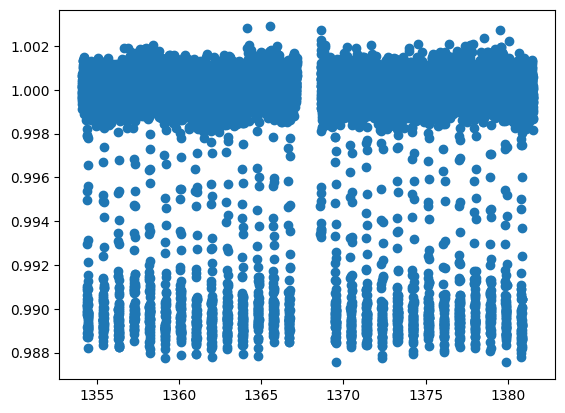

In [199]:
plt.scatter(data3[0],data3[1])
plt.show()

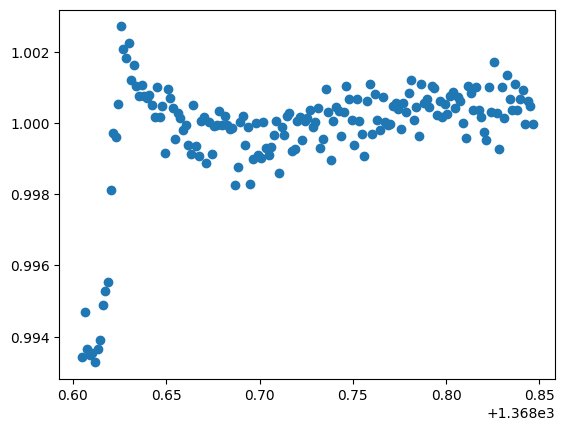

In [99]:
plt.scatter(data3[0,9225:9400],data3[1,9225:9400])
plt.show()

In [100]:
data3a = data3[:,:9225]
data3b = data3[:,9400:]

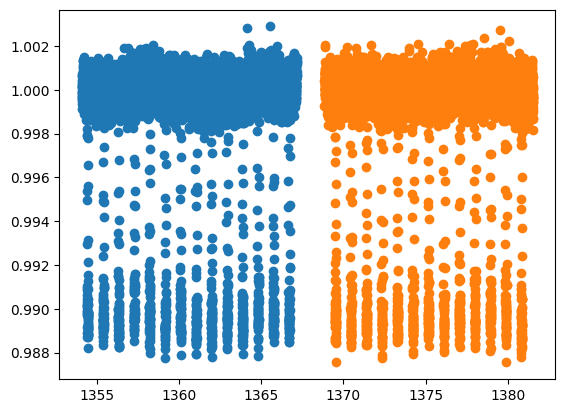

In [108]:
plt.scatter(data3a[0],data3a[1])
plt.scatter(data3b[0],data3b[1])
plt.show()

### Data8

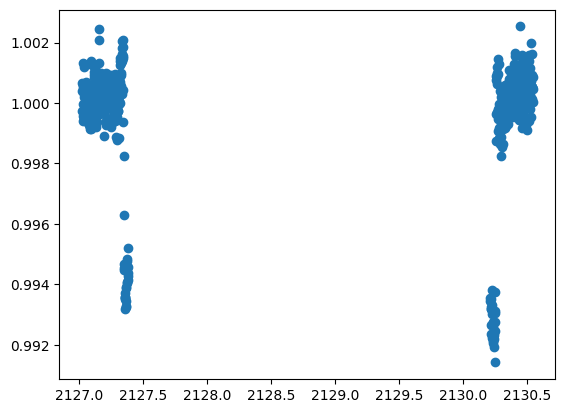

In [38]:
plt.scatter(data8[0,8000:8500],data8[1,8000:8500])
plt.show()

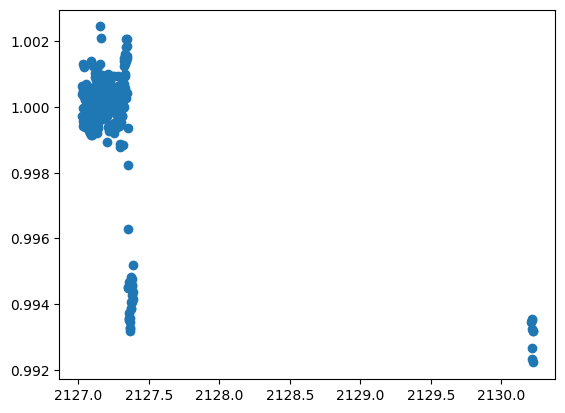

In [43]:
plt.scatter(data8[0,8000:8261],data8[1,8000:8261])
plt.show()

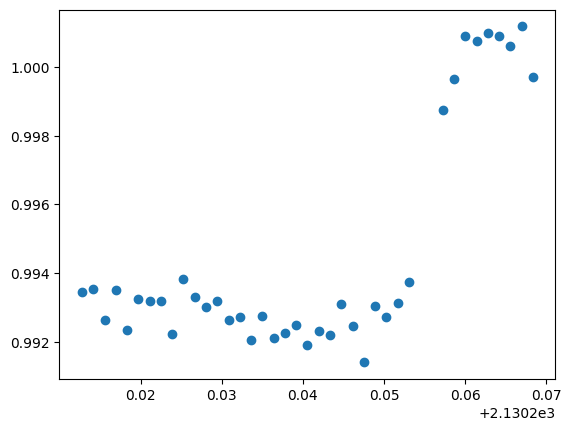

In [46]:
plt.scatter(data8[0,8261:8300],data8[1,8261:8300])
plt.show()

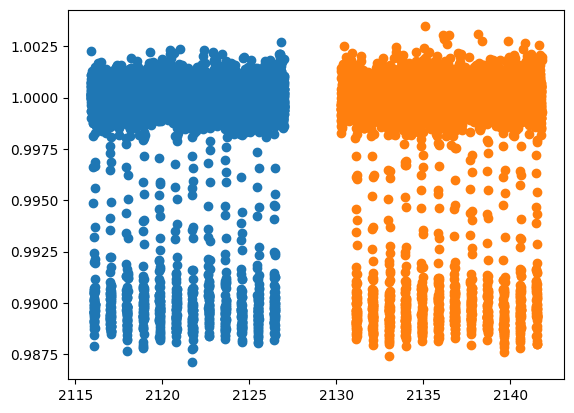

In [115]:
data8a = data8[:,:8000]
data8b = data8[:,8300:]
plt.scatter(data8a[0],data8a[1])
plt.scatter(data8b[0],data8b[1])
plt.show()

### Data10

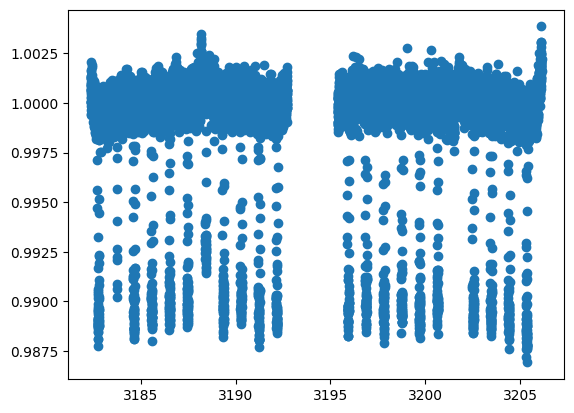

In [61]:
plt.scatter(data10[0],data10[1])
plt.show()

The first portion of the transit appears to have been taken out of the data. I think that we should not include this transit at all as a result since we don't have the full data of it.

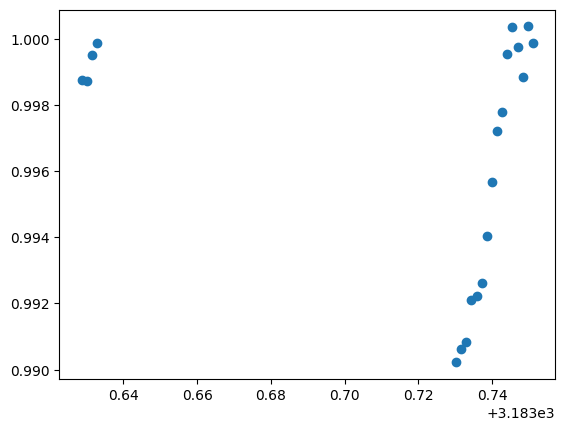

In [149]:
plt.scatter(data10[0,840:860],data10[1,840:860])
plt.show()

There's a weird up-tick in intensity, possibly from a solar flare or something else, and that data likely was flagged as not good quality, resulting in the first bit of the following transit being cut off. I think that we should take off the transit since we don't have the full picture and should also take off the portion that is going upwards since we don't have the data to see what is occurring.

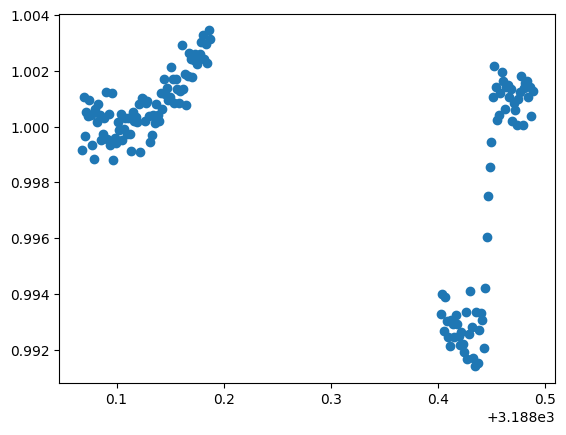

In [150]:
plt.scatter(data10[0,3900:4050],data10[1,3900:4050])
plt.show()

There appears to be another case of weird uptick in flux and the data for the rest of the transit not being included. I think we should exclude both the uptick and the unfinished transit.

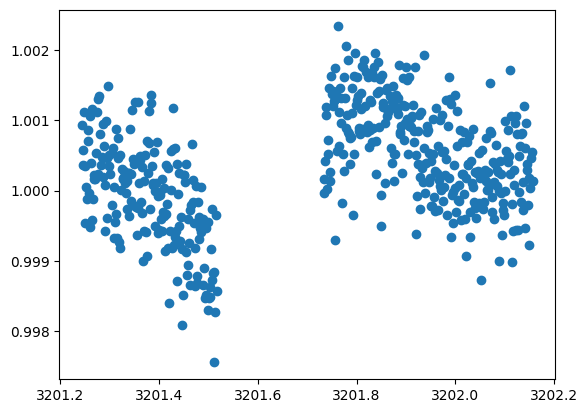

In [163]:
plt.scatter(data10[0,11300:11800],data10[1,11300:11800])
plt.show()

In [200]:
data10a = data10[:,:840]
data10b = data10[:,860:3900]
data10c = data10[:,4050:11300]
data10d = data10[:,11800:]

In [201]:
data = np.concatenate((data3a,data3b,data4,data6,data8a,data8b,data10a,data10b,data10c,data10d),axis=1)
data = data[:,~np.isnan(data[1])]

In [202]:
model = BoxLeastSquares(data4[0], data4[1])
periodGrid = model.autoperiod(0.09236232906494024)
#periodGrid[19000:20000]

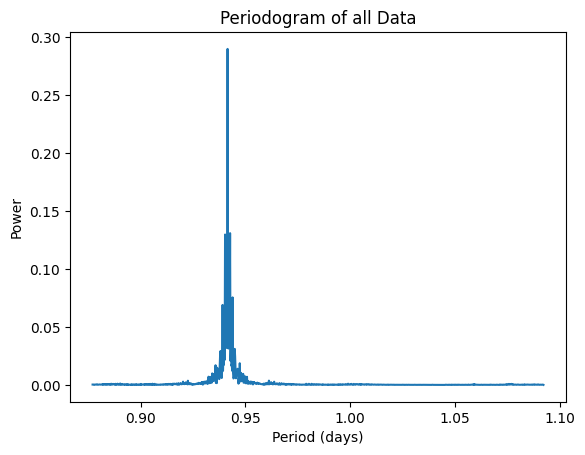

In [203]:
model = BoxLeastSquares(data[0], data[1])
periodogram = model.power(periodGrid[19000:20000],0.09236232906494024,method='fast')
plt.plot(periodogram.period, periodogram.power)
plt.title("Periodogram of all Data")
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.show()

In [204]:
max_power = np.argmax(periodogram.power)
stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])
period = periodogram.period[max_power]
epoch = periodogram.transit_time[max_power]
print(stats['depth'])
print(period)
print(epoch)

(0.008935824417788507, 0.012340153813640483)
0.9414570423764735
1354.4532478792596


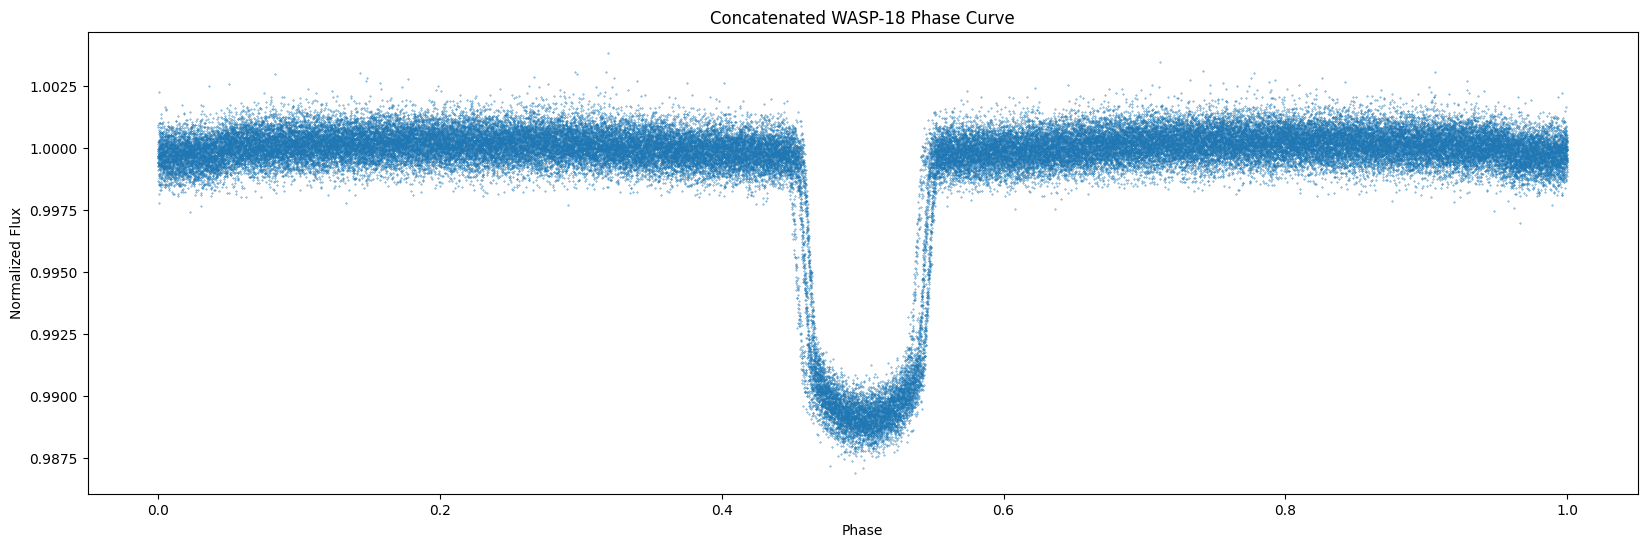

In [181]:
phase = ((data[0]-epoch+0.5*period)/period)%1.0
phaseFlux = data[1]
time = data[0]
time = time[np.argsort(phase)]
phaseFlux = phaseFlux[np.argsort(phase)]
phase = phase[np.argsort(phase)]

plt.figure(figsize=(20,6))
plt.title('Concatenated WASP-18 Phase Curve')
plt.xlabel('Phase')
plt.ylabel('Normalized Flux')
plt.scatter(phase,phaseFlux, s=0.1)
plt.show()

In [182]:
Rs = 1.657*9.955 #perform multiplication to convert it to Jupiter radius
radius = np.sqrt(stats['depth'][0])*Rs
print(radius)
inclination = 83.52*np.pi/180
impact = radius*np.cos(inclination)/Rs
print(impact)

1.5593050524798409
0.01066825646840048


# Getting Secondary Eclipse

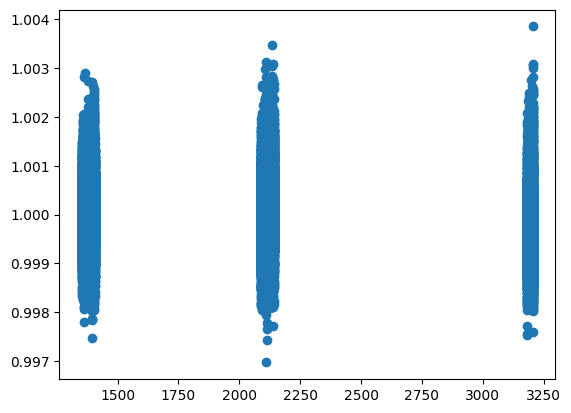

In [185]:
time = data[0]
flux = data[1]
phase = ((time-epoch)/period)%1.0

tempt = time[~((np.abs(phase-(duration/period)/2.0)<(duration/period)/2.0)|(np.abs(phase-1+(duration/period)/2.0)<(duration/period)/2.0))]
tempf = flux[~((np.abs(phase-(duration/period)/2.0)<(duration/period)/2.0)|(np.abs(phase-1+(duration/period)/2.0)<(duration/period)/2.0))]
plt.scatter(tempt,tempf)
plt.show()

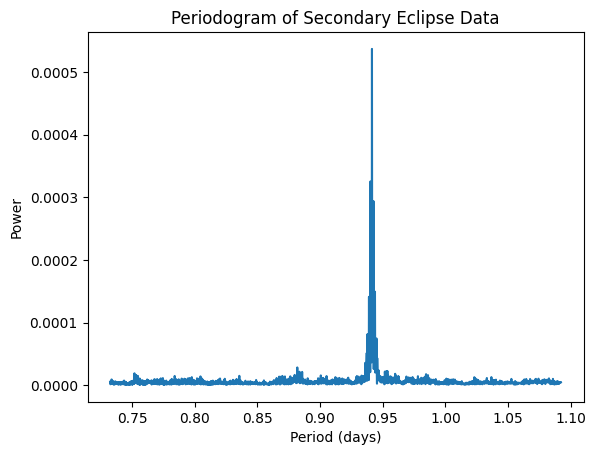

In [186]:
model = BoxLeastSquares(tempt, tempf)
periodogram = model.power(periodGrid[18000:20000],0.09236232906494024)
plt.plot(periodogram.period, periodogram.power)
plt.title("Periodogram of Secondary Eclipse Data")
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.show()

In [187]:
max_power = np.argmax(periodogram.power)
stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])
period = periodogram.period[max_power]
epoch = periodogram.transit_time[max_power]
print(period)
print(epoch)
print(stats['depth'])

0.9414570423764735
1354.9242957574907
(0.00037679971076898244, 0.012289343501107159)


## 3 Transit Secondary Eclipse Phase Curve

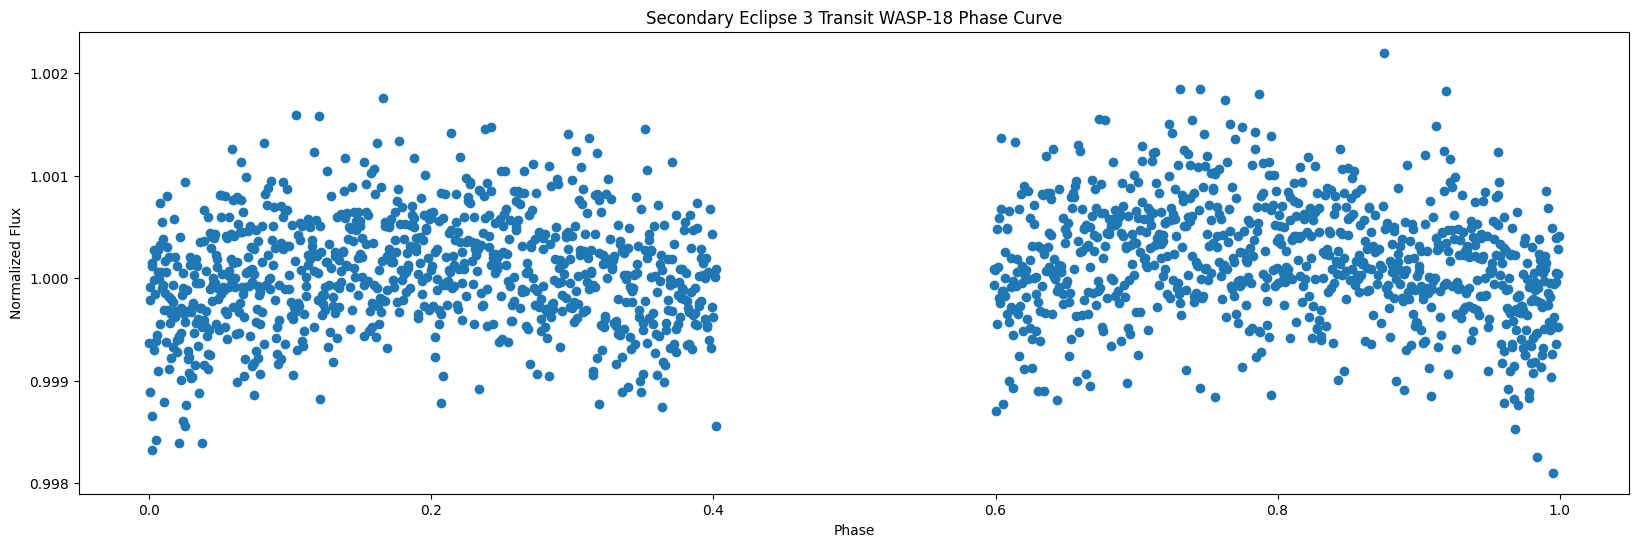

In [188]:
tripleTime = data4[0,0:2100]
tripleFlux = data4[1,0:2100]
phase = ((tripleTime-epoch+0.5*period)/period)%1.0

tripleTime = tripleTime[~((np.abs(phase-(duration/period)/2.0)<(duration/period)/2.0)|(np.abs(phase-1+(duration/period)/2.0)<(duration/period)/2.0))]
tripleFlux = tripleFlux[~((np.abs(phase-(duration/period)/2.0)<(duration/period)/2.0)|(np.abs(phase-1+(duration/period)/2.0)<(duration/period)/2.0))]

phase = ((tripleTime-epoch)/period)%1.0
tripleFlux = tripleFlux[np.argsort(phase)]
phase = phase[np.argsort(phase)]

plt.figure(figsize=(20,6))
plt.title('Secondary Eclipse 3 Transit WASP-18 Phase Curve')
plt.xlabel('Phase')
plt.ylabel('Normalized Flux')
plt.scatter(phase,tripleFlux)
plt.show()

## Full Secondary Eclipse Phase Curve

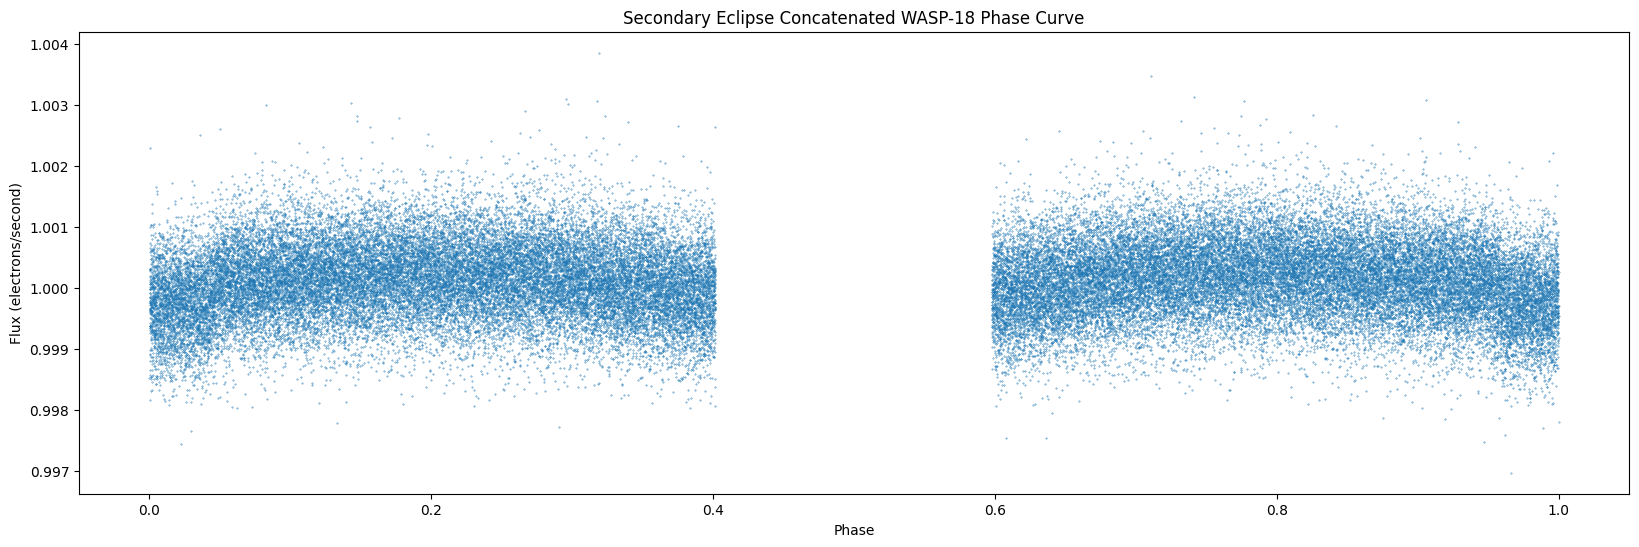

In [189]:
phase = ((tempt-epoch)/period)%1.0
tempf = tempf[np.argsort(phase)]
phase = phase[np.argsort(phase)]

plt.figure(figsize=(20,6))
plt.title('Secondary Eclipse Concatenated WASP-18 Phase Curve')
plt.xlabel('Phase')
plt.ylabel('Flux (electrons/second)')
plt.scatter(phase,tempf, s=0.1)
plt.show()

## Approximating WASP-18b Dayside Temperature

In [190]:
ts = 6360
tp = ts*((stats['depth'][0]/(radius**2/Rs**2))**0.25)
tp

2882.047266993402

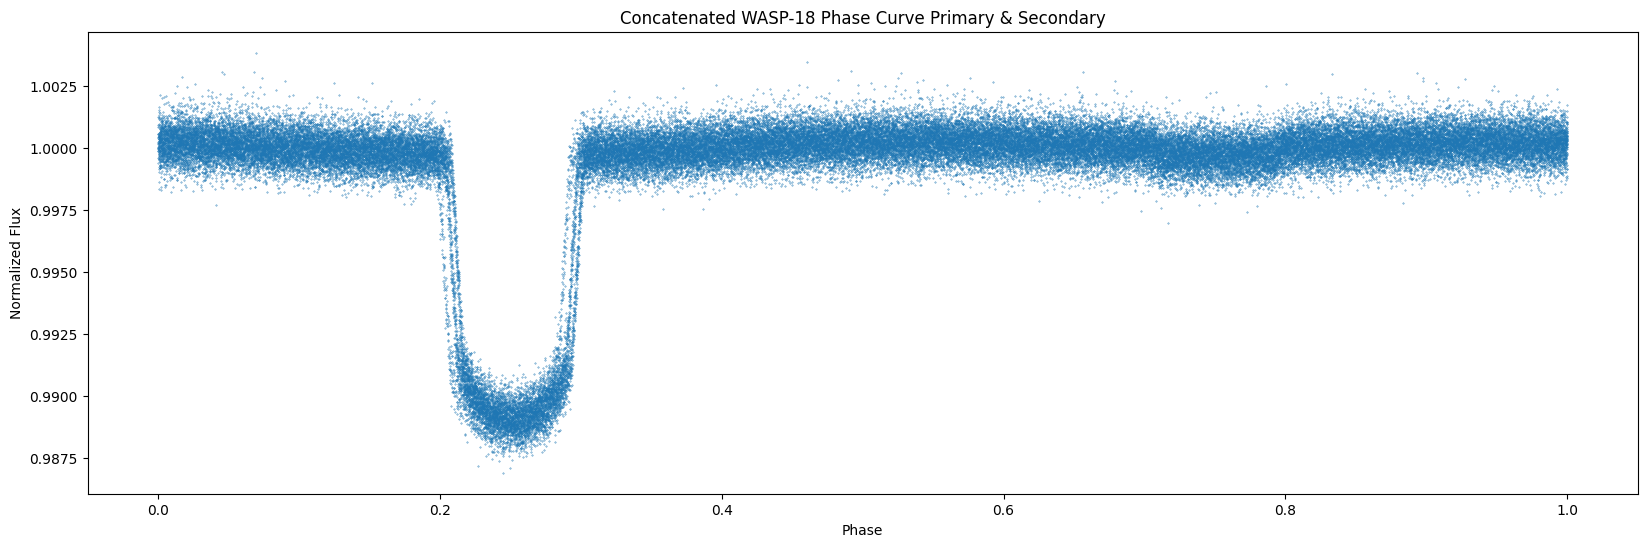

In [207]:
phase = ((data[0]-epoch+0.25*period)/period)%1.0
phaseFlux = data[1]
time = data[0]
time = time[np.argsort(phase)]
phaseFlux = phaseFlux[np.argsort(phase)]
phase = phase[np.argsort(phase)]

plt.figure(figsize=(20,6))
plt.title('Concatenated WASP-18 Phase Curve Primary & Secondary')
plt.xlabel('Phase')
plt.ylabel('Normalized Flux')
plt.scatter(phase,phaseFlux, s=0.1)
plt.show()